# Import Libraries

In [16]:
import numpy as np
import pandas as pd
import time

# matplotlib and seaborn for visualizing the data

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 20, 'linewidths':3}

# Counter for counting the number of data points in each clusters

from collections import Counter

# Necessary modules for Standardising the data and using ML algorithms
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering 

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.neighbors import NearestNeighbors


# silhouette_score for evaluating the clusters, ranges from -1 to +1, desirable score is close to 1

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Pre Defined Function

In [17]:
#This is the clustering and clusters plotting function
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time),
    fontsize=14)

# Task 1.a - Load data

In [18]:
# data = np.load('/content/data.npy')
data = np.load('data.npy')

In [19]:
data.shape

(400, 2)

In [20]:
data[:10]

array([[ 0.84219027,  0.03995678],
       [ 0.57487825, -0.43018898],
       [-0.33429872,  0.85586816],
       [ 0.75188718,  0.56642066],
       [ 1.9682912 ,  0.45406949],
       [ 0.0943052 ,  1.03902341],
       [-0.85792872,  0.72692826],
       [-0.8777414 ,  0.2861317 ],
       [ 1.04007903,  0.45056114],
       [-0.72950773,  0.60590778]])

# Task 1.b - Scatter Plot

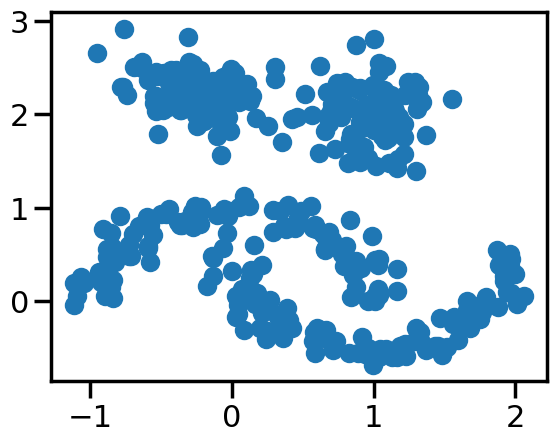

In [22]:
plt.scatter(data.T[0],data.T[1])
frame = plt.gca()


In [7]:
import pandas as pd
df = pd.DataFrame(data)
df.head()

,0,1
0,0.842190,0.039957
1,0.574878,-0.430189
2,-0.334299,0.855868
3,0.751887,0.566421
4,1.968291,0.454069


In [8]:
df.describe()

,0,1
count,400.000000,400.000000
mean,0.436506,1.177235
std,0.770268,1.026886
min,-1.118994,-0.679813
25%,-0.198819,0.267527
50%,0.479283,1.257689
75%,1.031272,2.156108
max,2.066618,2.916550


In [ ]:
# # !pip install hdbscan
# # conda install -c conda-forge hdbscan
# !pip install --upgrade pip
# !pip install hdbscan

In [2]:
# import hdbscan
# from sklearn.cluster import hdbscan

ImportError: cannot import name 'hdbscan' from 'sklearn.cluster' (C:\Users\Sandesh.Bharitkar\Anaconda3\lib\site-packages\sklearn\cluster\__init__.py)

In [10]:
scaler = StandardScaler()
# stdDf = pd.DataFrame(st.fit_transform(df), columns=df.columns)

X_scaled = scaler.fit_transform(df) 
  
# Normalizing the Data 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
# X_normalized = pd.DataFrame(X_normalized) 

In [38]:
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 4, affinity ='rbf') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_normalized)

In [39]:
X_normalized

,0,1
0,0.429467,-0.903083
1,0.114014,-0.993479
2,-0.954416,-0.298479
3,0.567002,-0.823716
4,0.942639,-0.333814
...,...,...
395,-0.132017,0.991247
396,-0.774373,0.632729
397,0.663682,0.748015
398,0.373308,0.927708


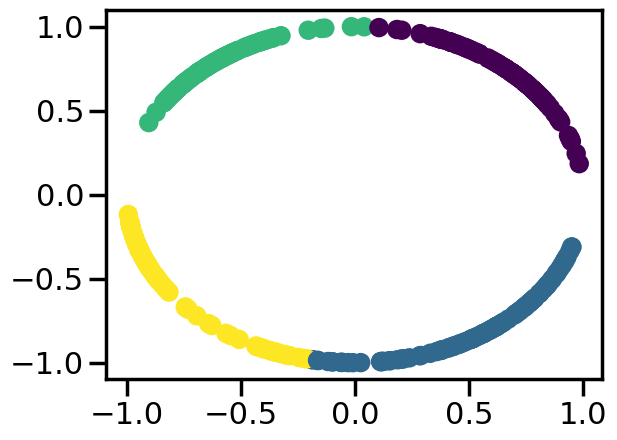

In [41]:
# Visualizing the clustering 
plt.scatter(X_normalized[0], X_normalized[1],  
           c = SpectralClustering(n_clusters = 4, affinity ='rbf') .fit_predict(X_normalized)) 
plt.show() 

In [44]:
data

array([[ 8.42190274e-01,  3.99567798e-02],
       [ 5.74878246e-01, -4.30188983e-01],
       [-3.34298724e-01,  8.55868156e-01],
       [ 7.51887179e-01,  5.66420658e-01],
       [ 1.96829120e+00,  4.54069490e-01],
       [ 9.43052026e-02,  1.03902341e+00],
       [-8.57928718e-01,  7.26928262e-01],
       [-8.77741403e-01,  2.86131701e-01],
       [ 1.04007903e+00,  4.50561139e-01],
       [-7.29507726e-01,  6.05907778e-01],
       [ 2.15297871e-01,  3.87256797e-01],
       [ 9.16084778e-01, -3.85910154e-01],
       [ 1.01214100e+00,  4.42124974e-01],
       [-8.98874152e-01,  5.23740780e-02],
       [ 5.84921266e-01,  8.10289170e-01],
       [-1.09509961e+00,  5.47572086e-02],
       [ 8.76293743e-01,  4.32447577e-01],
       [ 3.10620784e-02,  5.63179244e-02],
       [-2.60230056e-01,  1.01279458e+00],
       [ 4.74298677e-01,  9.34670681e-01],
       [ 9.75119016e-01, -5.85777333e-01],
       [ 1.67983202e+00, -2.82643918e-01],
       [ 8.42495766e-01,  3.80258480e-01],
       [ 3.

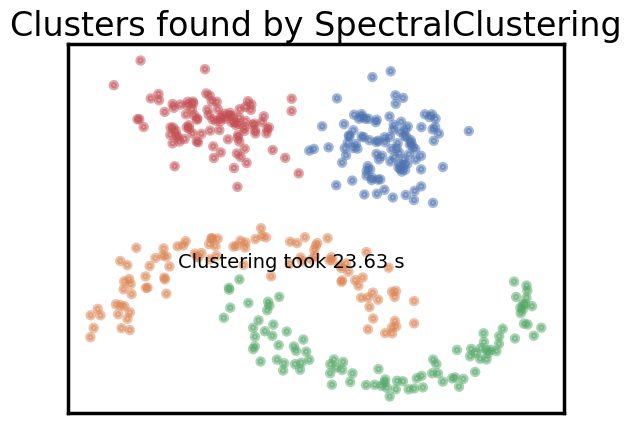

In [72]:
# plot_clusters(data, cluster.DBSCAN, (), {'eps':0.22, 'min_samples':5})
# 'gamma' : 250
plot_clusters(data, SpectralClustering, (), {'n_clusters': 4, 'affinity' :'laplacian','gamma' : 60})

In [ ]:
st = StandardScaler()
stdDf = pd.DataFrame(st.fit_transform(df), columns=df.columns)

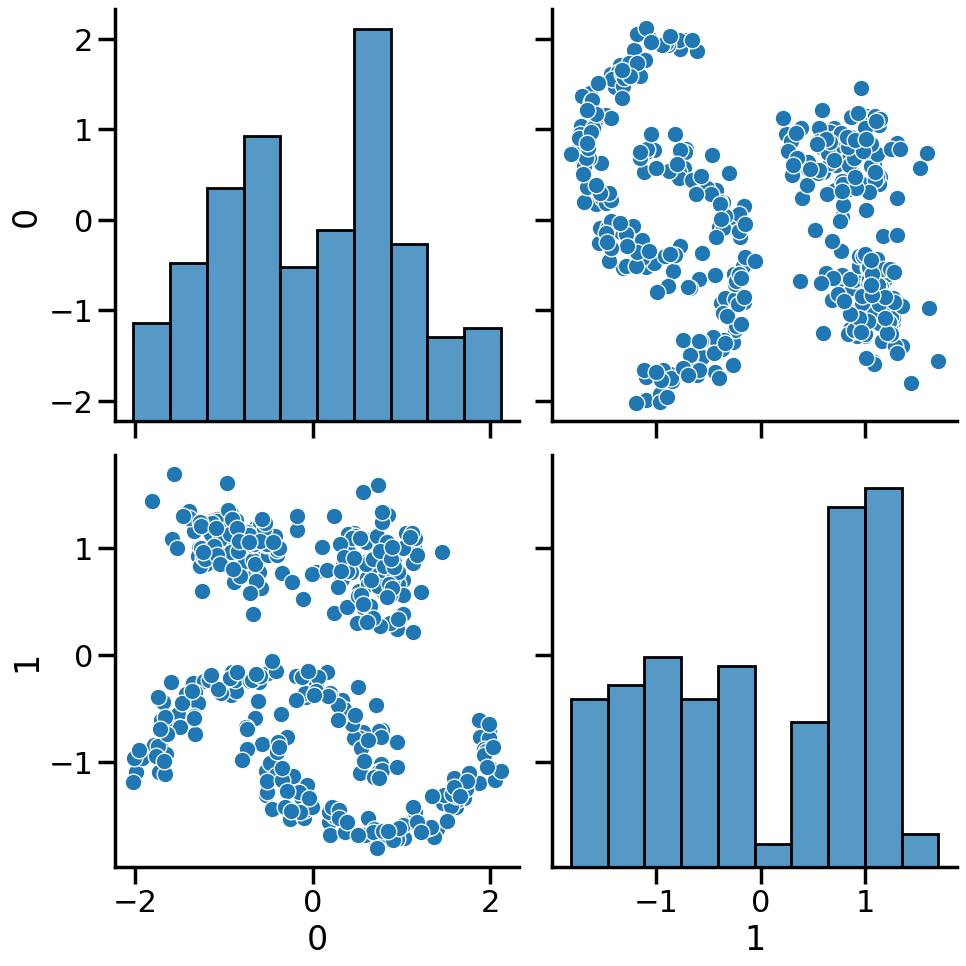

In [ ]:
sns.pairplot(stdDf, height=5);

In [ ]:
k = 2 * data.shape[-1] - 1
k

3

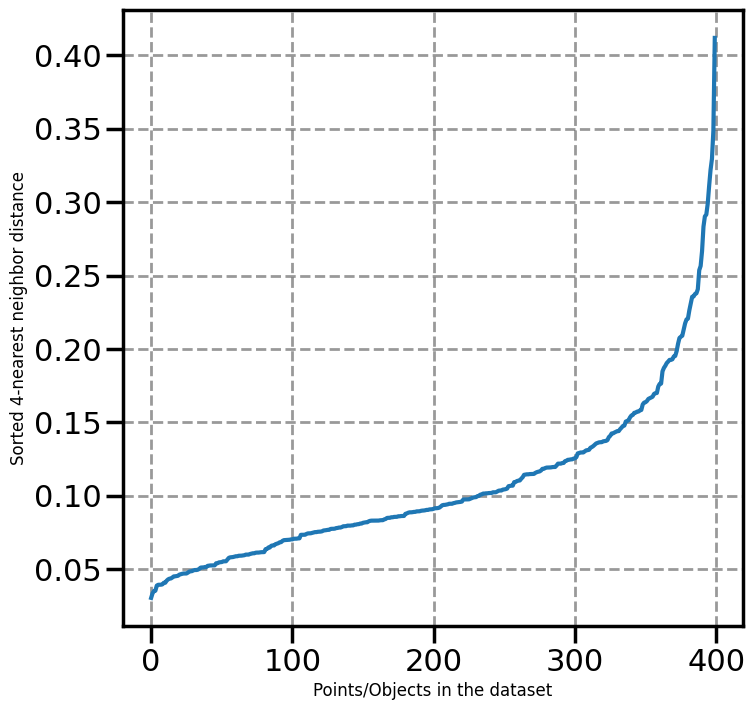

In [ ]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X)

    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * data.shape[-1] - 1 # k=2*{dim(dataset)} - 1
# k = 20
get_kdist_plot(X=data, k=k)

In [ ]:
nn = NearestNeighbors(n_neighbors=k).fit(stdDf)
distances, indices = nn.kneighbors(stdDf)

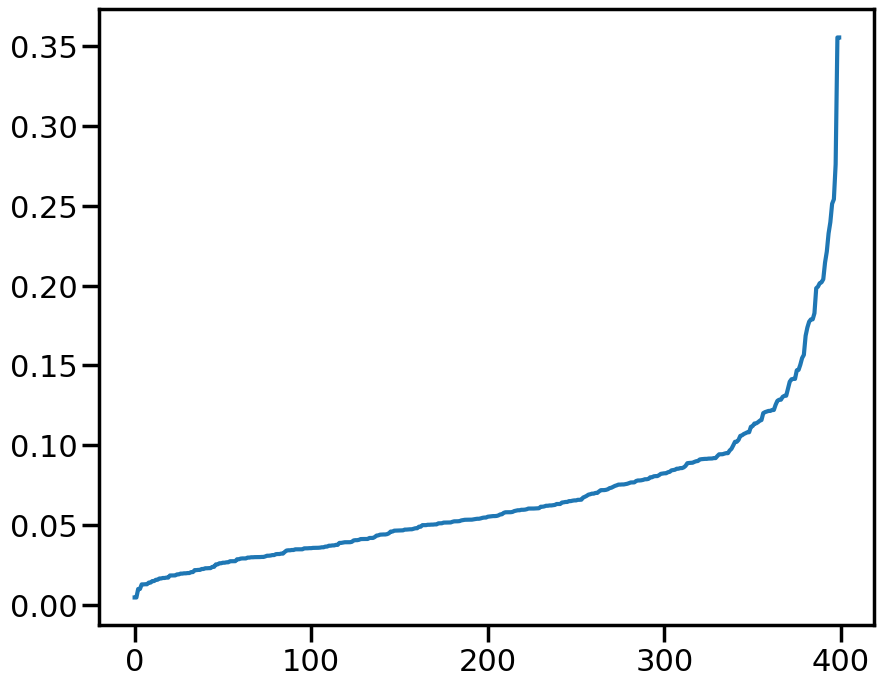

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

Lets consider eps range 0.10 to 0.25 and _min_sample_ range 2 to 10 and iterate over these combinations and get the best silhouette score.

In [ ]:
min_samples = range(2,10)
eps = np.arange(0.10,0.30, 0.01) # returns array of ranging from 0.05 to 0.13 with step of 0.01

In [ ]:
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(stdDf).labels_
        score = silhouette_score(stdDf, labels)
        output.append((ms, ep, score))

In [ ]:
sorted(output,key=lambda x:x[-1])

[(9, 0.11, -0.2884233813802764),
 (8, 0.1, -0.282474179762006),
 (9, 0.1, -0.24308107436979184),
 (6, 0.11, -0.18168829625316849),
 (7, 0.1, -0.17938515594045615),
 (5, 0.1, -0.14301508853573),
 (6, 0.1, -0.14004983819394504),
 (8, 0.11, -0.13755421447773472),
 (9, 0.12, -0.13676897436789134),
 (7, 0.11, -0.1053925711420965),
 (8, 0.12, -0.06803491981274125),
 (7, 0.12, -0.03642929021662107),
 (2, 0.23999999999999994, -0.02985768271658703),
 (9, 0.13, -0.019811776461201955),
 (5, 0.11, -0.012923767350429514),
 (6, 0.12, 0.0046042468626123064),
 (9, 0.14999999999999997, 0.005832892072239781),
 (8, 0.13, 0.008025059207954098),
 (4, 0.1, 0.013686502312851099),
 (7, 0.13, 0.014147549833405347),
 (8, 0.13999999999999999, 0.020822770231865836),
 (9, 0.13999999999999999, 0.02394656437700493),
 (8, 0.14999999999999997, 0.02526632079581871),
 (9, 0.15999999999999998, 0.02737440375772449),
 (6, 0.13, 0.02742287391800936),
 (2, 0.24999999999999992, 0.03255568651360854),
 (7, 0.13999999999999999, 

In [ ]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.47546575640751193
min_samples: 4
eps: 0.18999999999999995


In [ ]:
labels = DBSCAN(min_samples=min_samples, eps = eps).fit(stdDf).labels_
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette_score: {silhouette_score(stdDf, labels)}")

Number of clusters: 7
Number of outliers: 22
Silhouette_score: 0.47546575640751193


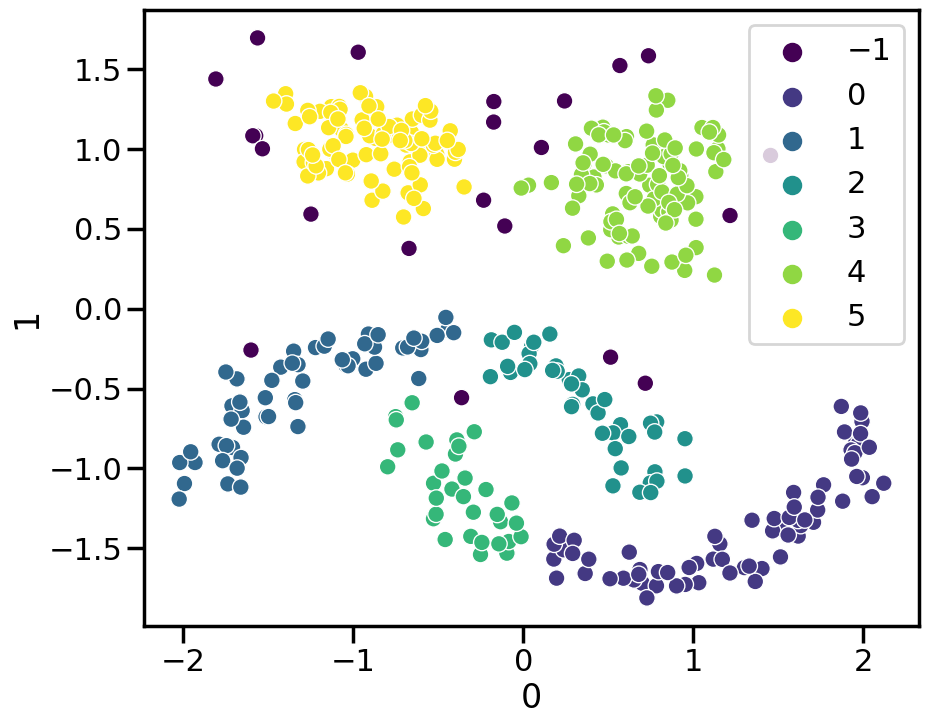

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=stdDf[0], y=stdDf[1], hue=labels, palette='viridis');

In [ ]:
k = 2 * data.shape[-1] - 1
k

3

In [ ]:
output = []
k_values = range(2,8)
#number of cluseters
k_values = [4]
for k in k_values:
    labels = KMeans(n_clusters=k).fit(stdDf).labels_
    score = silhouette_score(stdDf, labels)
    output.append((k, score))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
k, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"k: {k}")

Best silhouette_score: 0.5498477797025787
k: 4


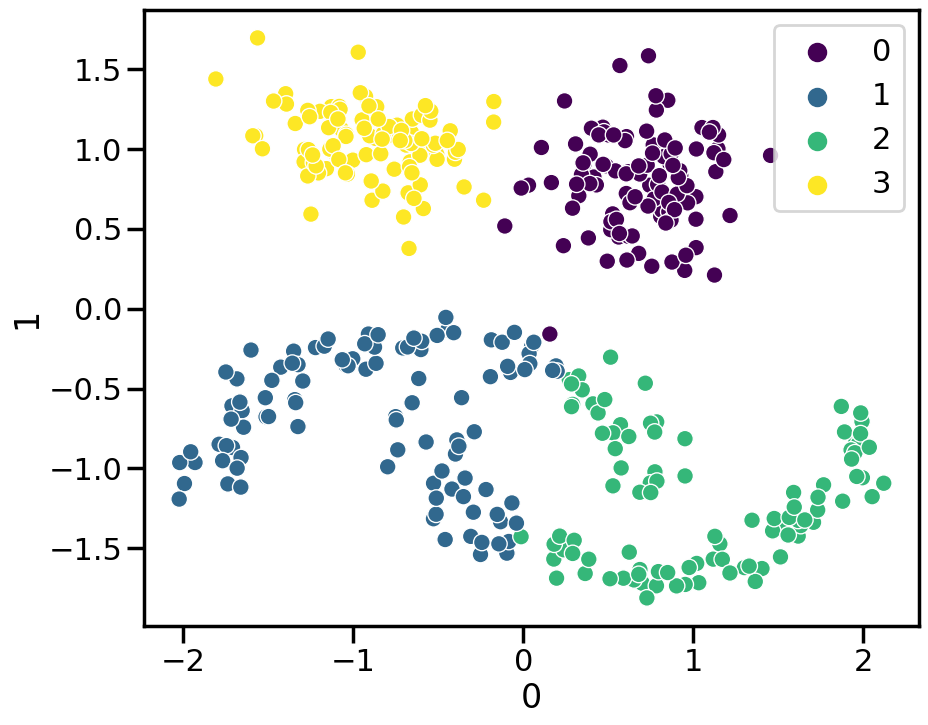

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=stdDf[0], y=stdDf[1], hue=labels, palette='viridis');


In [ ]:
min_samples,eps

(4, 0.18999999999999995)

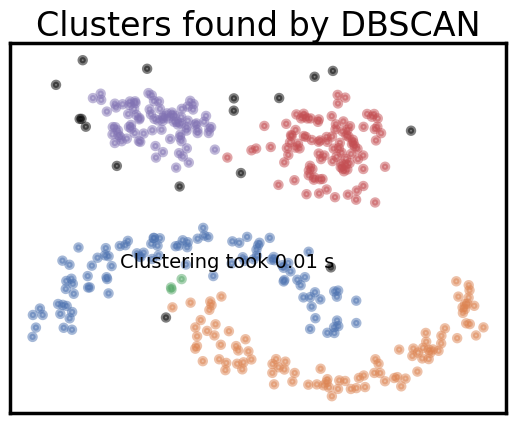

In [ ]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':eps, 'min_samples':min_samples})

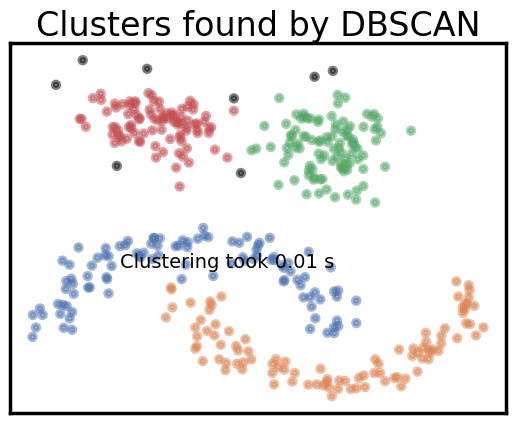

In [ ]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.22, 'min_samples':5})

In [ ]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X)

    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * data.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=data, k=k)

Mean Slope: -0.6542169587459495
Standard Deviation of Slope: 8.119514936543268


In [ ]:
import numpy as np

# Load your data from the 'data.npy' file
data = np.load('data.npy')

# Calculate the slope between consecutive points
slopes = (data[1:, 1] - data[:-1, 1]) / (data[1:, 0] - data[:-1, 0])

# Calculate the mean slope
mean_slope = np.mean(slopes)

# Print the result
print(f"Mean Slope: {mean_slope}")


import numpy as np

# Load your data from the 'data.npy' file
data = np.load('data.npy')

# Calculate the slope between consecutive points
slopes = (data[1:, 1] - data[:-1, 1]) / (data[1:, 0] - data[:-1, 0])

# Calculate the standard deviation of the slopes
std_dev_slope = np.std(slopes)

# Print the result
print(f"Standard Deviation of Slope: {std_dev_slope}")


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

# Calculate pairwise distances using the Euclidean distance formula
distances = euclidean_distances(data)

# Now, 'distances' is a matrix where distances[i, j] represents the Euclidean distance between data points i and j.

# Print the distance matrix
#print(distances)
sorted_distances = np.sort(distances, axis=1)
print(sorted_distances)

[[0.         0.12082265 0.12850675 ... 3.01348728 3.17015573 3.29493511]
 [0.         0.07447214 0.09253942 ... 3.37288346 3.44081446 3.60484298]
 [0.         0.0476343  0.0494356  ... 2.42774305 2.50990324 2.53040453]
 ...
 [0.         0.04224369 0.06951582 ... 3.01686087 3.09326392 3.18041738]
 [0.         0.05994866 0.06466215 ... 2.67577592 2.67610629 2.70511768]
 [0.         0.01645827 0.06967776 ... 2.79026087 2.79148423 2.88023272]]


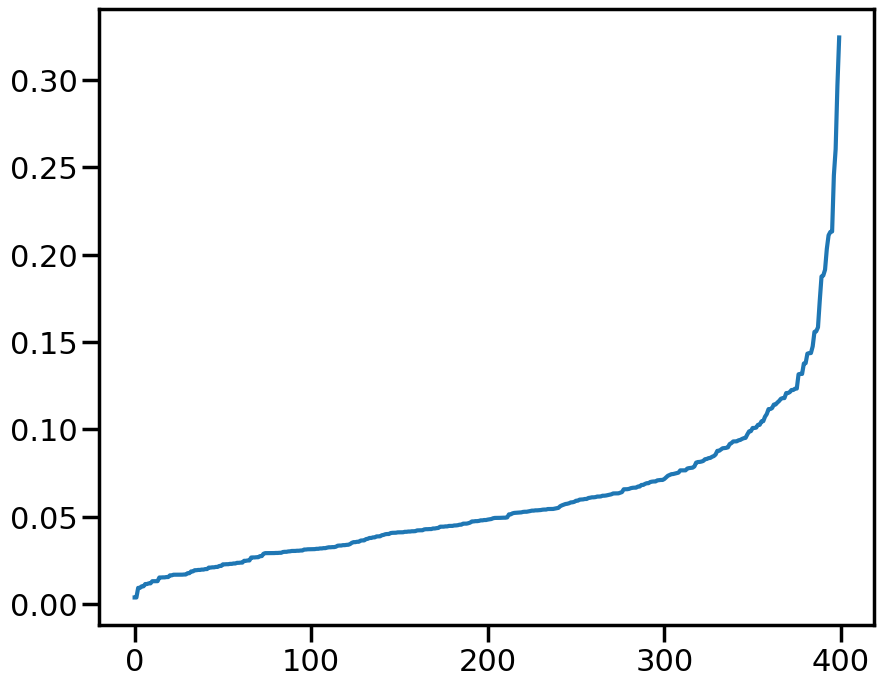

In [ ]:
distances = np.sort(sorted_distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

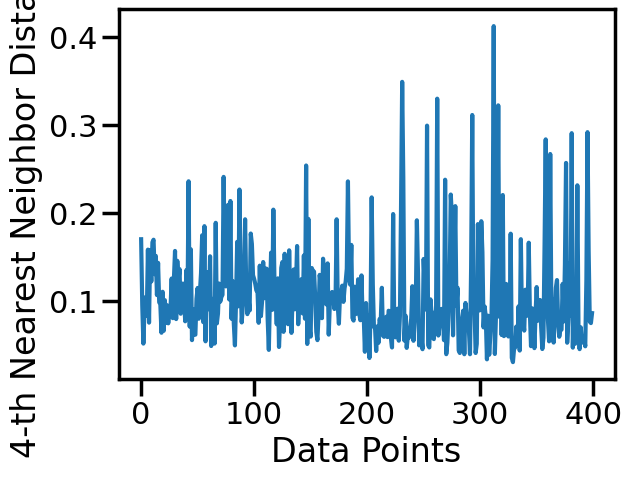

In [ ]:
k = 4  # Adjust the value of k based on your dataset

plt.plot(np.arange(len(data)), sorted_distances[:, k - 1])
plt.xlabel('Data Points')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.show()

In [ ]:
point1 = data[10]  # Replace with the index of the first point
point2 = data[11]  # Replace with the index of the second point

# Euclidean distance between point1 and point2
distance = np.linalg.norm(point2 - point1)

print(distance)

1.0434986458754532


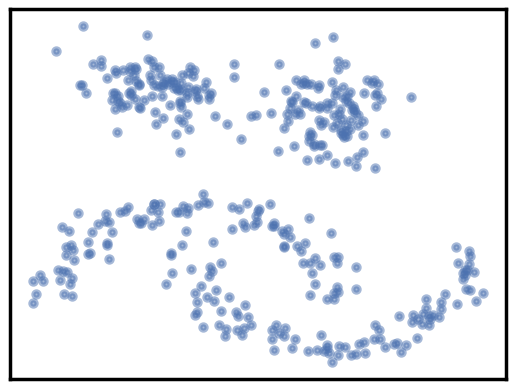

In [ ]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


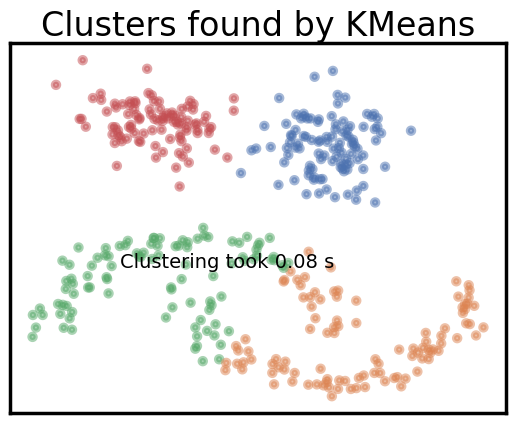

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4, })

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


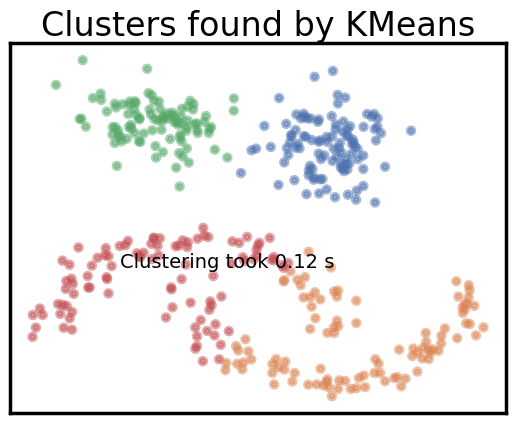

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4, 'init':'k-means++'})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


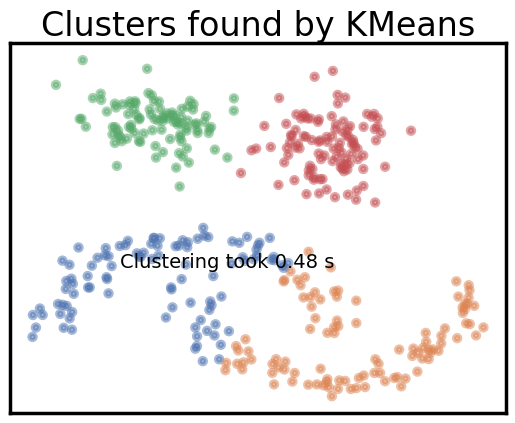

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4, 'init':'random'})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


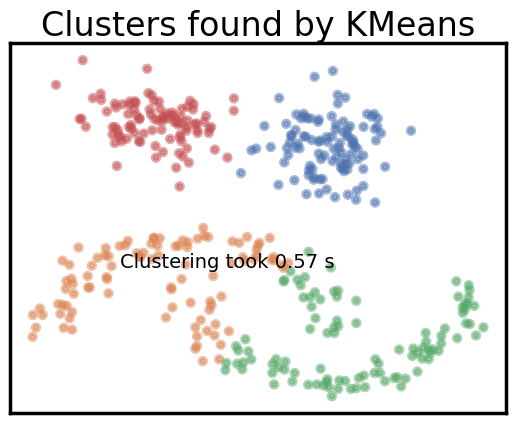

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4, 'init':'random','max_iter':500})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


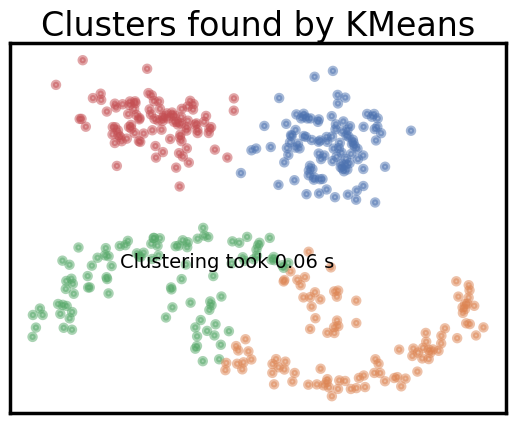

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4, 'init':'random','max_iter':100})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


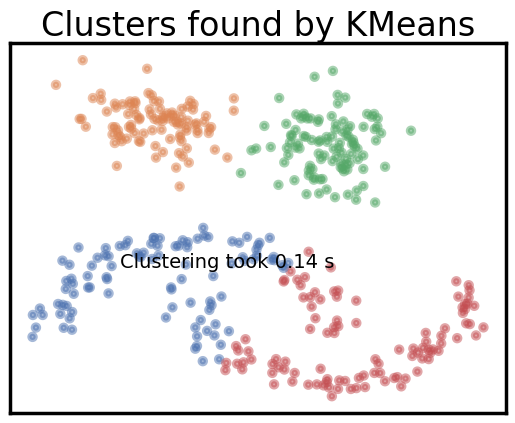

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4, 'init':'random','max_iter':100,'algorithm':'lloyd'})

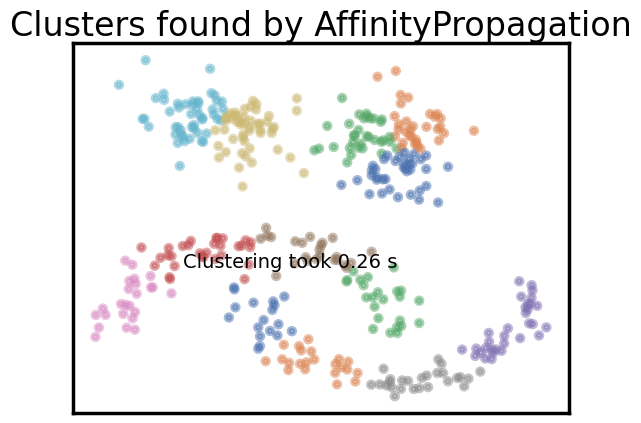

In [ ]:
from scipy.spatial.distance import pdist
init = np.min(pdist(data))
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-2*1.5878186219904045})

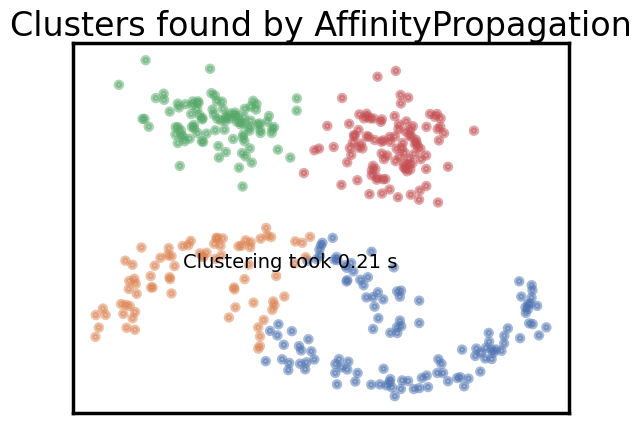

In [ ]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-50,'damping':0.7, 'max_iter':40})

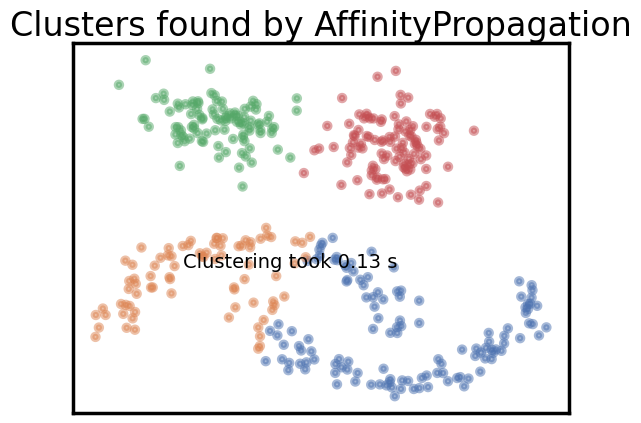

In [ ]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-50,'damping':0.7})

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs

# Generate some example data
#data, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Compute the pairwise distances (or similarities) between data points
pairwise_similarities = pairwise_distances(data, metric='euclidean')

# Flatten the upper triangle of the similarity matrix (excluding the diagonal)
upper_triangle_values = pairwise_similarities[np.triu_indices(pairwise_similarities.shape[0], k=1)]

# Calculate the median of the flattened values
median_similarity = np.median(upper_triangle_values)

print(f'Median Similarity: {median_similarity}')

Median Similarity: 1.5878186219904045


In [ ]:
-2*1.5

-3.0

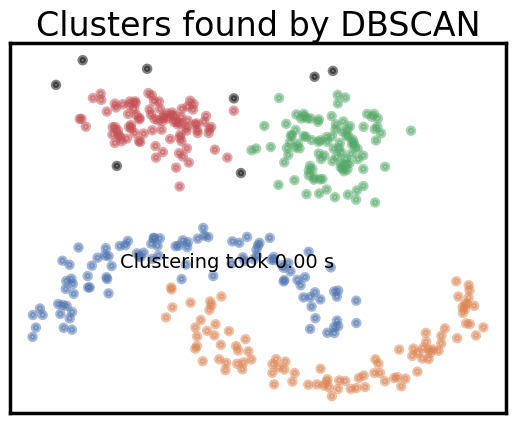

In [ ]:
##dbscan
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.22, 'min_samples':5})

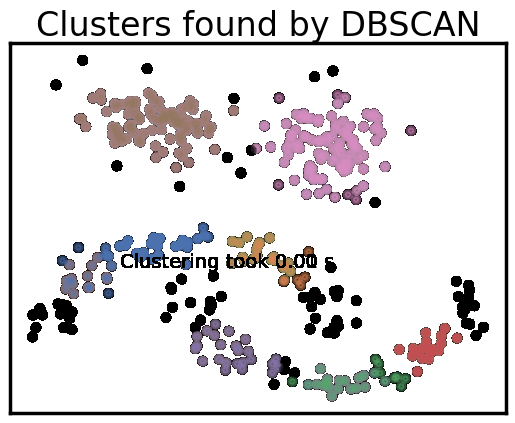

In [ ]:
min_samples = range(1,15)
eps = np.arange(0.05,0.25, 0.01)
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
output = []

for ms in min_samples:
    for ep in eps:
       # labels = DBSCAN(min_samples=ms, eps = ep).fit(data)
        plot_clusters(data, cluster.DBSCAN, (), {'eps':ep, 'min_samples':ms})
        #score = silhouette_score(data, labels)
        output.append((ms, ep))